In [1]:
# Import all the required libraries

# used to change filepaths
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np
import cv2

# import Image from PIL
from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2grey

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# import train_test_split from sklearn's model selection module
from sklearn.model_selection import train_test_split

# import SVC from sklearn's svm module
from sklearn.svm import SVC

# import accuracy_score from sklearn's metrics module
from sklearn.metrics import roc_curve, auc, accuracy_score

In [2]:
# The function below is from https://stackoverflow.com/questions/30230592/loading-all-images-using-imread-from-a-given-folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [3]:
folder_path_yes = "transverse_bands/yes"
folder_path_no = "transverse_bands/no"

In [4]:
yes_images = load_images_from_folder(folder_path_yes)
no_images = load_images_from_folder(folder_path_no)

In [5]:
no_images = no_images[0:1900]

In [6]:
display(len(yes_images))
len(no_images)

1900

1900

In [9]:
yes_labels = np.ones(1900)
no_labels = np.zeros(1900)

In [10]:
yes_labels
no_labels

array([0., 0., 0., ..., 0., 0., 0.])

In [11]:
# Converting the lists of images into numpy arrays
numpy_yes_images = np.array(yes_images)
numpy_no_images = np.array(no_images)

/home/ngwetl/.conda/envs/da/lib/python3.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app
/home/ngwetl/.conda/envs/da/lib/python3.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


In [13]:
yes_df = pd.DataFrame(numpy_yes_images, columns = ['image'])
no_df = pd.DataFrame(numpy_no_images, columns = ['image'])

In [14]:
yes_df["label"] = yes_labels
no_df["label"] = no_labels

In [15]:
display(yes_df)
no_df

,image,label
0,"[[[38, 65, 79], [67, 91, 109], [52, 76, 96], [...",1.0
1,"[[[159, 181, 199], [158, 180, 198], [156, 178,...",1.0
2,"[[[108, 129, 137], [62, 80, 87], [51, 65, 71],...",1.0
3,"[[[78, 58, 53], [71, 50, 45], [82, 65, 59], [7...",1.0
4,"[[[70, 87, 103], [77, 96, 108], [64, 85, 99], ...",1.0
...,...,...
1895,"[[[198, 190, 190], [197, 189, 189], [196, 188,...",1.0
1896,"[[[40, 15, 7], [40, 14, 8], [41, 15, 8], [41, ...",1.0
1897,"[[[59, 81, 109], [52, 74, 102], [50, 73, 99], ...",1.0
1898,"[[[159, 162, 167], [185, 188, 193], [201, 204,...",1.0


,image,label
0,"[[[234, 238, 239], [230, 234, 235], [228, 232,...",0.0
1,"[[[244, 239, 240], [243, 238, 239], [231, 226,...",0.0
2,"[[[228, 230, 230], [229, 231, 231], [205, 207,...",0.0
3,"[[[73, 113, 132], [75, 112, 131], [69, 103, 12...",0.0
4,"[[[212, 200, 199], [209, 197, 197], [194, 182,...",0.0
...,...,...
1895,"[[[237, 239, 240], [234, 236, 237], [234, 236,...",0.0
1896,"[[[181, 183, 184], [174, 176, 177], [163, 165,...",0.0
1897,"[[[226, 226, 226], [219, 219, 219], [217, 217,...",0.0
1898,"[[[104, 93, 89], [87, 76, 72], [81, 66, 63], [...",0.0


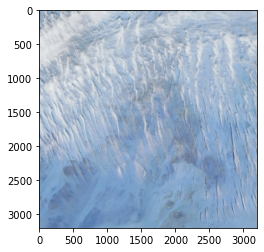

In [16]:
plt.imshow(yes_df['image'][1])
plt.show()

In [17]:
combined_data = yes_df.append(no_df, ignore_index=True)

In [18]:
# shuffle the DataFrame rows 
combined_data = combined_data.sample(frac = 1)
combined_data

,image,label
2237,"[[[151, 140, 136], [147, 136, 132], [140, 129,...",0.0
2342,"[[[52, 60, 60], [45, 53, 53], [44, 52, 52], [5...",0.0
1298,"[[[77, 94, 80], [125, 142, 129], [41, 61, 49],...",1.0
1927,"[[[223, 225, 225], [241, 243, 243], [236, 238,...",0.0
1393,"[[[30, 18, 12], [30, 18, 12], [30, 18, 12], [3...",1.0
...,...,...
628,"[[[89, 67, 56], [80, 58, 47], [70, 48, 37], [6...",1.0
1803,"[[[232, 231, 233], [227, 226, 228], [226, 225,...",1.0
2136,"[[[215, 215, 215], [222, 222, 222], [228, 228,...",0.0
8,"[[[36, 16, 11], [40, 19, 15], [40, 18, 13], [4...",1.0


In [20]:
# Helper functions from DataCamp

# Create image features and flatten into a single row
def create_features(img):
    # flatten three channel color image
    color_features = img.flatten()
    # convert image to greyscale
    grey_image = rgb2grey(img)
    # get HOG features from greyscale image
    hog_features = hog(grey_image, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    # combine color and hog features into a single array
    flat_features = np.hstack([color_features, hog_features])
    return flat_features

In [21]:
# Loop over images to preprocess
def create_feature_matrix(images):
    features_list = []
    
    for img in images:
        # get features
        img = Image.fromarray(img)
        img = img.resize(size=(100, 100))
    
        img_arr = np.array(img)
        image_features = create_features(img_arr)
        features_list.append(image_features)
        
    # convert list of arrays into a matrix
    feature_matrix = np.array(features_list)
    return feature_matrix

# run create_feature_matrix on our dataframe of images
feature_matrix = create_feature_matrix(combined_data.image)

/home/ngwetl/.conda/envs/da/lib/python3.7/site-packages/ipykernel/__main__.py:8: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.


In [34]:
display(len(feature_matrix[0]))

31296

In [23]:
feature_matrix

array([[1.29000000e+02, 1.19000000e+02, 1.15000000e+02, ...,
        2.18855989e-01, 1.31544875e-01, 1.71737671e-01],
       [4.80000000e+01, 5.60000000e+01, 5.60000000e+01, ...,
        9.12268912e-02, 1.40755515e-01, 1.68903324e-01],
       [7.50000000e+01, 9.00000000e+01, 7.70000000e+01, ...,
        1.85934782e-02, 2.05506931e-02, 4.93040505e-02],
       ...,
       [2.30000000e+02, 2.30000000e+02, 2.30000000e+02, ...,
        1.49134058e-01, 9.34570643e-02, 1.34618059e-01],
       [4.30000000e+01, 2.20000000e+01, 1.80000000e+01, ...,
        3.78116242e-02, 9.65196724e-02, 6.10639630e-02],
       [2.25000000e+02, 2.28000000e+02, 2.25000000e+02, ...,
        1.01489180e-01, 6.07733711e-02, 5.37773223e-02]])

In [24]:
feature_matrix[0]

array([129.        , 119.        , 115.        , ...,   0.21885599,
         0.13154487,   0.17173767])

In [35]:
# Scale feature matrix

# get shape of feature matrix
print('Feature matrix shape is: ', feature_matrix.shape)

# define standard scaler
ss = StandardScaler()
# run this on our feature matrix
scaled_images = ss.fit_transform(feature_matrix)

Feature matrix shape is:  (3800, 31296)


In [29]:
combined_data.label.values

array([0., 0., 1., ..., 0., 1., 0.])

In [30]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_images,
                                                    combined_data.label.values,
                                                    test_size=.3,
                                                    random_state=1234123)

# look at the distribution of labels in the train set
pd.Series(y_train).value_counts()


1.0    1349
0.0    1311
dtype: int64

In [31]:
# define support vector classifier
svm = SVC(kernel='linear', probability=True, random_state=42)

# fit model
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [32]:
# generate predictions
y_pred = svm.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.6640350877192982


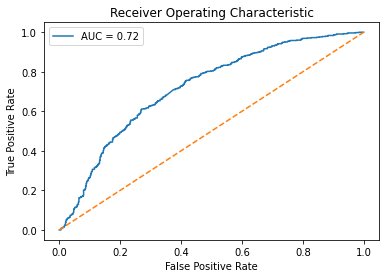

In [33]:
# predict probabilities for X_test using predict_proba
probabilities = svm.predict_proba(X_test)
# select the probabilities for label 1.0
y_proba = probabilities[:, 1]
# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)
# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))
plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');